In [80]:
"""
1) Import modules
2) Load pd dataframe
3) View df statistics
    3.1 View head
    3.2 Describe 
    3.3 
4)
""" 


'\n1) Import modules\n2) Load pd dataframe\n3) View df statistics\n    3.1 View head\n    3.2 Describe \n    3.3 \n4)\n'

In [81]:
# 1) import modules 
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
import sys, os
import seaborn as sns
from datetime import datetime

In [82]:
# 2.1 Load pd dataframe 
df = pd.read_csv("data/BITSTAMP_BTCUSD_DAY.csv")

# 2.2 invert df index
df = df.reindex(index=df.index[::-1])
df = df.reset_index(drop=True)
;

''

In [83]:
# Set non-exponential notion
pd.options.display.float_format = '{:.5f}'.format

#pd.reset_option('^display.', silent=True)

In [84]:
# 3) View DF statistics
df

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,1417132800,2014-11-28 00:00:00,BTC/USD,363.59000,381.34000,360.57000,376.28000,3220878.18000,8617.15000
1,1417219200,2014-11-29 00:00:00,BTC/USD,376.42000,386.60000,372.25000,376.72000,2746157.05000,7245.19000
2,1417305600,2014-11-30 00:00:00,BTC/USD,376.57000,381.99000,373.32000,373.34000,1145566.61000,3046.33000
3,1417392000,2014-12-01 00:00:00,BTC/USD,376.40000,382.31000,373.03000,378.39000,2520662.37000,6660.56000
4,1417478400,2014-12-02 00:00:00,BTC/USD,378.39000,382.86000,375.23000,379.25000,2593576.46000,6832.53000
...,...,...,...,...,...,...,...,...,...
2803,1659312000,2022-08-01 00:00:00,BTC/USD,23287.38000,23511.50000,22861.00000,23282.92000,1310.17181,30504625.32254
2804,1659398400,2022-08-02 00:00:00,BTC/USD,23291.67000,23468.33000,22665.98000,23001.52000,1441.50642,33156838.71940
2805,1659484800,2022-08-03 00:00:00,BTC/USD,22997.07000,23642.14000,22686.12000,22835.88000,1306.29502,29830396.39097
2806,1659571200,2022-08-04 00:00:00,BTC/USD,22830.37000,23228.77000,22400.00000,22615.24000,1537.96630,34781476.88351


In [85]:
df.describe()

,Unix,Open,High,Low,Close,Volume BTC,Volume USD
count,2808.00000,2808.00000,2808.00000,2808.00000,2808.00000,2808.00000,2808.00000
mean,1538395200.00000,12825.50386,13193.10217,12399.73010,12833.50089,12556904.20353,61699923.93076
std,70048290.46993,16618.15271,17078.50425,16069.51245,16617.96392,45917791.84428,105257248.21022
min,1417132800.00000,162.00000,212.84000,152.40000,162.00000,0.00000,0.00000
25%,1477764000.00000,702.92750,714.00000,691.06750,703.47250,4606.92471,10114.39500
50%,1538395200.00000,6769.97000,6970.25500,6599.27500,6773.44500,12167.94066,27471669.97652
75%,1599026400.00000,11976.49500,12552.72000,11650.50250,12012.31000,3112223.84250,81184761.05326
max,1659657600.00000,67547.49000,69000.00000,66250.00000,67559.00000,772329454.80000,1446125474.07654


In [86]:
df["rsi"] = ta.rsi(df["Close"], 14)
macd_df = ta.macd(df["Close"], fast=12, slow=26, signal=9)

In [87]:
df = df.join(macd_df)

In [88]:
ma50 = ta.ema(df['Close'], length=50)
ma200 = ta.ema(df['Close'], length=200)

df['ma50'] = ma50
df['ma200'] = ma200

In [89]:
df.drop(df.tail(33).index, inplace=True)

In [90]:
df

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,rsi,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ma50,ma200
0,1417132800,2014-11-28 00:00:00,BTC/USD,363.59000,381.34000,360.57000,376.28000,3220878.18000,8617.15000,NaN,NaN,NaN,NaN,NaN,NaN
1,1417219200,2014-11-29 00:00:00,BTC/USD,376.42000,386.60000,372.25000,376.72000,2746157.05000,7245.19000,NaN,NaN,NaN,NaN,NaN,NaN
2,1417305600,2014-11-30 00:00:00,BTC/USD,376.57000,381.99000,373.32000,373.34000,1145566.61000,3046.33000,NaN,NaN,NaN,NaN,NaN,NaN
3,1417392000,2014-12-01 00:00:00,BTC/USD,376.40000,382.31000,373.03000,378.39000,2520662.37000,6660.56000,NaN,NaN,NaN,NaN,NaN,NaN
4,1417478400,2014-12-02 00:00:00,BTC/USD,378.39000,382.86000,375.23000,379.25000,2593576.46000,6832.53000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,1656460800,2022-06-29 00:00:00,BTC/USD,20253.88000,20398.99000,19827.00000,20093.18000,1605.32356,32256055.29031,31.78549,-2146.71085,222.92544,-2369.63629,26603.21792,36439.50594
2771,1656547200,2022-06-30 00:00:00,BTC/USD,20098.00000,20131.06000,18595.60000,19924.89000,4907.84854,97788342.30114,31.21857,-2087.04685,226.07155,-2313.11840,26341.32271,36275.18140
2772,1656633600,2022-07-01 00:00:00,BTC/USD,19960.61000,20895.08000,18944.69000,19239.47000,4424.08856,85117119.10130,28.95354,-2071.19491,193.53879,-2264.73370,26062.81868,36105.67184
2773,1656720000,2022-07-02 00:00:00,BTC/USD,19263.41000,19425.08000,18960.00000,19228.25000,1478.97412,28438084.09136,28.91656,-2036.06699,182.93337,-2219.00036,25794.79638,35937.73729


In [ ]:
df.ma

In [98]:
def cross(index):
    if df.ma50[index] <= df.ma200[index] and ma50[index + 1] > ma200[index]:
        return 1
    elif ma50[index] >= ma200[index] and ma50[index + 1] < ma200[index]:
        return -1
    else: 
        return 0

In [95]:
df['cross'] = np.arange(len(df))

In [104]:
df.join(df[.apply(func=cross))

ValueError: columns overlap but no suffix specified: Index(['cross'], dtype='object')

In [106]:
df.index

AttributeError: 'RangeIndex' object has no attribute 'apply'

In [100]:
df['cross'].value_counts()

0       1
1854    1
1846    1
1847    1
1848    1
       ..
926     1
927     1
928     1
929     1
2774    1
Name: cross, Length: 2775, dtype: int64

In [ ]:
df

In [ ]:
df

In [ ]:
df.head()

In [7]:
# Remove Symbol columns
df = df.drop(columns="Symbol")

In [8]:
df.head()

,Unix,Date,Open,High,Low,Close,Volume BTC,Volume USD,rsi
2807,1417132800,2014-11-28 00:00:00,363.59000,381.34000,360.57000,376.28000,3220878.18000,8617.15000,NaN
2806,1417219200,2014-11-29 00:00:00,376.42000,386.60000,372.25000,376.72000,2746157.05000,7245.19000,NaN
2805,1417305600,2014-11-30 00:00:00,376.57000,381.99000,373.32000,373.34000,1145566.61000,3046.33000,NaN
2804,1417392000,2014-12-01 00:00:00,376.40000,382.31000,373.03000,378.39000,2520662.37000,6660.56000,NaN
2803,1417478400,2014-12-02 00:00:00,378.39000,382.86000,375.23000,379.25000,2593576.46000,6832.53000,NaN


In [9]:
# Create a list of columns for learning
df.columns

Index(['Unix', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume BTC',
       'Volume USD', 'rsi'],
      dtype='object')

In [10]:
etc_cols_ind = [0, 1]
num_cols_ind = [5, 6, 8]

etc_cols = df.columns[etc_cols_ind]
num_cols = df.columns[num_cols_ind]

In [11]:
df[num_cols].corr()

,Close,Volume BTC,rsi
Close,1.00000,-0.06551,-0.04180
Volume BTC,-0.06551,1.00000,0.08032
rsi,-0.04180,0.08032,1.00000


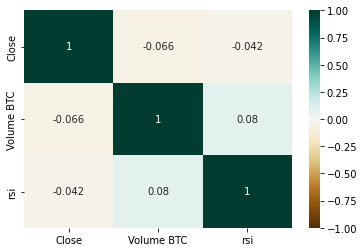

In [12]:
heatmap = sns.heatmap(df[num_cols].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
